In [1]:
from __future__ import (division, print_function, absolute_import,unicode_literals)
import sys,os,shutil
import subprocess
#import simplejson
import logging ,os 
import time
import operator
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import pandas as pd


In [2]:
def log(message):
    """ Log messages to standard output. """
    print(time.ctime() + ' --- ' + message, flush=True)

In [3]:
def run_cmd(cmnd):
  try:
     output = subprocess.check_output(
        cmnd, stderr=subprocess.STDOUT, shell=True,
        universal_newlines=True)
  except subprocess.CalledProcessError as exc:
     print("Status : FAIL", exc.returncode, exc.output)
  else:
    print("Output: \n{}\n".format(output))

In [4]:
# Setup environment to run nextstrain
#run_cmd("/home/idies/workspace/Storage/sramakr4/persistent/bashrc")
%env PATH=$PATH:/home/idies/workspace/Storage/sramakr4/persistent/bin:/home/idies/workspace/Storage/sramakr4/persistent/miniconda3/envs/nextstrain/bin:/home/idies/miniconda3/condabin:/home/idies/.local/bin:/bin
%env PYTHONPATH=$PYTHONPATH:/home/idies/workspace/Storage/sramakr4/persistent/miniconda3/envs/nextstrain/lib/python3.6/site-packages
%env JUPYTER_PATH=$JUPYTER_PATH:/home/idies/workspace/Storage/sramakr4/persistent/miniconda3/envs/nextstrain/lib/python3.6/site-packages       

env: PATH=$PATH:/home/idies/workspace/Storage/sramakr4/persistent/bin:/home/idies/workspace/Storage/sramakr4/persistent/miniconda3/envs/nextstrain/bin:/home/idies/miniconda3/condabin:/home/idies/.local/bin:/bin
env: PYTHONPATH=$PYTHONPATH:/home/idies/workspace/Storage/sramakr4/persistent/miniconda3/envs/nextstrain/lib/python3.6/site-packages
env: JUPYTER_PATH=$JUPYTER_PATH:/home/idies/workspace/Storage/sramakr4/persistent/miniconda3/envs/nextstrain/lib/python3.6/site-packages


In [5]:
WORKING_DIR="/home/idies/workspace/Storage/sramakr4/persistent/nextstrain_scripts/ncov"
os.chdir(WORKING_DIR)


In [172]:
snp_report="/home/"
snp_table = pd.read_table("/home/idies/workspace/covid")
snp_table.head()
d= snp_table['%OCCURENCES'].to_numpy()
snp_table.describe()

FileNotFoundError: [Errno 2] File b'/home/idies/workspace/Storage/sramakr4/persistent/nextstrain_scripts/ncov/test/test.report' does not exist: b'/home/idies/workspace/Storage/sramakr4/persistent/nextstrain_scripts/ncov/test/test.report'

(0.0, 3430.0)

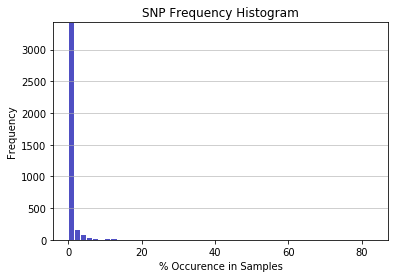

In [48]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(x=d, bins=50, color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('% Occurence in Samples')
plt.ylabel('Frequency')
plt.title('SNP Frequency Histogram')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)


In [163]:
snps_vcf = pd.read_table("/home/idies/workspace/Storage/sramakr4/persistent/nextstrain_scripts/ncov/test/snps_msa.vcf", skiprows=3)
exclude_list = pd.read_table("/home/idies/workspace/Storage/sramakr4/persistent/nextstrain_scripts/ncov/test/exclude_samples.txt",header=None)
#snps_vcf.head()
print(exclude_list)
print(snps_vcf.shape)
print(snps_vcf.columns)
snps_vcf.drop(exclude_list[0],axis=1, inplace=True)
snps_vcf = snps_vcf[snps_vcf.ALT.str.contains('A|C|G|T|a|c|g|t') == True]
out_vcf = snps_vcf.iloc[:,0:8]
out_vcf['TOTAL_SAMPLES']= (snps_vcf.shape[1]-9)
out_vcf['OCCURENCES']= snps_vcf.iloc[:,9:snps_vcf.shape[1]].sum(axis=1)
counts= {}
aln_counts = []
for i in range(snps_vcf.shape[0]):
    #print(snps_vcf.iloc[i,9:snps_vcf.shape[1]])
    counts = snps_vcf.iloc[i,9:snps_vcf.shape[1]].value_counts().to_dict()
    sorted_counts={k: counts[k] for k in sorted(counts)}
    counts = ",".join([ str(counts[i]) for i in sorted_counts if i != 0])
    aln_counts.append(counts)

out_vcf['OCCURENCES'] = aln_counts
#for row in snps_vcf.iterrows():
#    print(row[9])
#out_vcf['%_OCCURENCES']= [ round(float(i/(snps_vcf.shape[1]-9) * 100 ),2) if i != 0 else 0 for i in out_vcf['OCCURENCES']  ] 
print(out_vcf.head())
print(out_vcf.shape)

                   0
0    USA/MDHM-6/2020
1    USA/MDHM-7/2020
2   USA/MDHM-10/2020
3   USA/MDHM-15/2020
4   USA/MDHM-22/2020
5   USA/MDHM-32/2020
6   USA/MDHM-33/2020
7   USA/MDHM-16/2020
8   USA/MDHM-20/2020
9   USA/MDHM-23/2020
10  USA/MDHM-24/2020
11  USA/MDHM-25/2020
12  USA/MDHM-26/2020
13  USA/MDHM-28/2020
14  USA/MDHM-29/2020
15  USA/MDHM-30/2020
16  USA/MDHM-36/2020
17  USA/MDHM-37/2020
18  USA/MDHM-38/2020
19  USA/MDHM-43/2020
20  USA/MDHM-44/2020
21  USA/MDHM-46/2020
22  USA/MDHM-48/2020
23  USA/MDHM-49/2020
24  USA/MDHM-50/2020
25  USA/MDHM-51/2020
26  USA/MDHM-52/2020
27  USA/MDHM-53/2020
28  USA/MDHM-56/2020
29  USA/MDHM-57/2020
30  USA/MDHM-59/2020
31  USA/MDHM-61/2020
32  USA/MDHM-62/2020
33  USA/MDHM-63/2020
34  USA/MDHM-64/2020
35  USA/MDHM-65/2020
36  USA/MDHM-67/2020
(1200, 5007)
Index(['#CHROM', 'POS', 'ID', 'REF', 'ALT', 'QUAL', 'FILTER', 'INFO', 'FORMAT',
       'USA/WI-11/2020',
       ...
       'Georgia/Tb-390/2020', 'England/20130050904/2020',
       'England

In [47]:
#from Bio import SeqIO
snps_vcf = pd.read_table("/home/idies/workspace/Storage/sramakr4/persistent/nextstrain_scripts/test/snps_msa_all.vcf", skiprows=3)
row_id = snps_vcf[snps_vcf['POS'] == 241].index.to_list()[0]


In [24]:
run_cmd("ls /home/idies/workspace/Storage/sramakr4/persistent/miniconda3/envs/nextstrain/lib/python3.6/site-packages/pysam")

Output: 
Pileup.py
TabProxies.cpython-36m-x86_64-linux-gnu.so
TabProxies.pxd
TabProxies.py
__init__.py
__pycache__
calignmentfile.cpython-36m-x86_64-linux-gnu.so
calignmentfile.pxd
calignmentfile.py
cbcf.cpython-36m-x86_64-linux-gnu.so
cbcf.pxd
cbcf.py
cfaidx.cpython-36m-x86_64-linux-gnu.so
cfaidx.pxd
cfaidx.py
chtslib.pxd
csamfile.cpython-36m-x86_64-linux-gnu.so
csamfile.pxd
csamfile.py
csamtools.cpython-36m-x86_64-linux-gnu.so
csamtools.pxd
csamtools.py
ctabix.cpython-36m-x86_64-linux-gnu.so
ctabix.pxd
ctabix.py
cvcf.cpython-36m-x86_64-linux-gnu.so
cvcf.pxd
cvcf.py
htslib_util.h
include
libchtslib.cpython-36m-x86_64-linux-gnu.so
libchtslib.py
namedtuple.py
pysam_stream.h
pysam_util.h
samfile_util.h
tabix_util.h
version.py




In [27]:
!pip install pysam

SyntaxError: invalid syntax (<ipython-input-30-2b72591b62cc>, line 1)